Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [2]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-01-16 01:49:49--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.37.38
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.37.38|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’

instacart_online_gr 100%[===================>] 196.03M  34.7MB/s    in 6.2s    

2020-01-16 01:49:56 (31.5 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.1’ saved [205548478/205548478]



In [3]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [4]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [5]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

In [0]:
##### YOUR CODE HERE #####

import pandas as pd

#start by reading in each csv
aisles = pd.read_csv('aisles.csv')
departments = pd.read_csv('departments.csv')
order_products = pd.concat([pd.read_csv('order_products__prior.csv'), 
                            pd.read_csv('order_products__train.csv')])
orders = pd.read_csv('orders.csv')
products = pd.read_csv('products.csv')

In [7]:
# If this was my first time seeing the data, I'd view the head of each of these,
# but instead I just review what columns we have
print(aisles.columns.to_list())
print(departments.columns.to_list())
print(order_products.columns.to_list())
print(orders.columns.to_list())
print(products.columns.to_list())

['aisle_id', 'aisle']
['department_id', 'department']
['order_id', 'product_id', 'add_to_cart_order', 'reordered']
['order_id', 'user_id', 'eval_set', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']
['product_id', 'product_name', 'aisle_id', 'department_id']


Columns needed should be:

* product_id
* product_name
* amount_ordered (new)



In [0]:
# we already have the first two
product_sales = products[['product_id', 'product_name']]

In [9]:
# we only care about those top 10 items, so filter that list
top_products = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries',
                'Organic Baby Spinach', 'Organic Hass Avocado', 
                'Organic Avocado', 'Large Lemon', 'Strawberries', 
                'Limes', 'Organic Whole Milk']

product_sales = product_sales[product_sales['product_name'].isin(top_products)]

product_sales = product_sales.reset_index(drop=True)
product_sales

,product_id,product_name
0,13176,Bag of Organic Bananas
1,16797,Strawberries
2,21137,Organic Strawberries
3,21903,Organic Baby Spinach
4,24852,Banana
5,26209,Limes
6,27845,Organic Whole Milk
7,47209,Organic Hass Avocado
8,47626,Large Lemon
9,47766,Organic Avocado


In [0]:
# Merge that with order_products to get a dataframe with one row for each time one of those products was ordered
merged = pd.merge(left=product_sales, right=order_products[['order_id', 'product_id']], on='product_id')

In [11]:
merged.head()

,product_id,product_name,order_id
0,13176,Bag of Organic Bananas,5
1,13176,Bag of Organic Bananas,27
2,13176,Bag of Organic Bananas,29
3,13176,Bag of Organic Bananas,32
4,13176,Bag of Organic Bananas,42


In [12]:
# There's the product counts, indexed by product_id
merged['product_id'].value_counts().sort_index()

13176    394930
16797    149445
21137    275577
21903    251705
24852    491291
26209    146660
27845    142813
47209    220877
47626    160792
47766    184224
Name: product_id, dtype: int64

In [13]:
# This cell is how I originally thought to do it, I modified my methods to use
# pd.merge() in the cells above.  I have left this cell to verify that the 
# counts are the same.

# filter to only the orders that included one of those product_id's
filtered_orders = (order_products[order_products['product_id']
                                 .isin(product_sales['product_id'])])

filtered_orders['product_id'].value_counts().sort_index()

13176    394930
16797    149445
21137    275577
21903    251705
24852    491291
26209    146660
27845    142813
47209    220877
47626    160792
47766    184224
Name: product_id, dtype: int64

In [15]:
# Merge those counts back into a new column

# First convert that series into it's own dataframe
order_counts = pd.DataFrame(merged['product_id'].value_counts().sort_index())
order_counts = order_counts.reset_index()
order_counts = order_counts.rename(columns={'index': 'product_id',
                                            'product_id': 'amount_ordered'})

order_counts

,product_id,amount_ordered
0,13176,394930
1,16797,149445
2,21137,275577
3,21903,251705
4,24852,491291
5,26209,146660
6,27845,142813
7,47209,220877
8,47626,160792
9,47766,184224


In [16]:
# And here's our complete answer!
product_sales = pd.merge(left=product_sales, right=order_counts, on='product_id')
product_sales

,product_id,product_name,amount_ordered
0,13176,Bag of Organic Bananas,394930
1,16797,Strawberries,149445
2,21137,Organic Strawberries,275577
3,21903,Organic Baby Spinach,251705
4,24852,Banana,491291
5,26209,Limes,146660
6,27845,Organic Whole Milk,142813
7,47209,Organic Hass Avocado,220877
8,47626,Large Lemon,160792
9,47766,Organic Avocado,184224


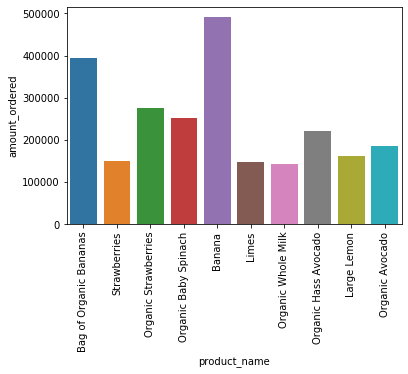

In [17]:
# For fun, let's graph it
import seaborn as sns

ax = sns.barplot(x='product_name', y='amount_ordered', data=product_sales)
ax.set_xticklabels(product_sales['product_name'], rotation = 90);

## Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [18]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [19]:
# table2 -> tidy

# use reset_index to move the index to a column
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [20]:
# then use melt() to change into tidy format
tidy = table2.melt(id_vars='index', value_vars=['John Smith', 'Jane Doe', 'Mary Johnson'])
tidy

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [21]:
# tidy -> table2

# pivot table is the inverse of melt, so we can use it to go back
pivot = tidy.pivot_table(index='index', columns='variable', values='value')
pivot

variable,Jane Doe,John Smith,Mary Johnson
index,,,
treatmenta,16.0,NaN,3.0
treatmentb,11.0,2.0,1.0


In [0]:
flights = sns.load_dataset('flights')

In [23]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [24]:
# Flights Pivot Table
flights.pivot_table(index='year', columns='month', values='passengers')

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [25]:
# The graph mentioned above
from IPython.display import display, Image
url = 'https://cdn-images-1.medium.com/max/1600/1*wKfV6OV-_1Ipwrl7AjjSuw.png'
example = Image(url=url, width=600)

display(example)

In [0]:
# The list of top 25 latest ordered popular products
product_list = ['Half Baked Frozen Yogurt', 'The Tonight Dough™ Ice Cream', 
                'Americone Dream® Ice Cream', 'Half Baked® Ice Cream', 
                'Phish Food® Ice Cream', 'Milk and Cookies Ice Cream',
                'Sicilian Pistachio', 'Chocolate Peanut Butter Cup Gelato',
                'Birthday Cake Light Ice Cream', 'Cherry Garcia Ice Cream', 
                'Strawberry Ice Cream', 'Vanilla Bean Light Ice Cream', 
                'Coffee Ice Cream', 'Roman Raspberry Sorbetto', 
                'Mediterranean Mint Gelato', 'Caramel Cookie Crunch Gelato',
                'Chocolate Chip Cookie Dough Ice Cream', 'Mint Chip', 
                'Coconut Almond Minis Frozen Dessert Bars', 
                'Mint Chocolate Chip Ice Cream', 
                'Chocolate Peanut Butter Ice Cream', 
                'Vanilla Milk Chocolate Almond Ice Cream Bars',
                'Sea Salt Caramel Gelato', 'Vanilla Bean Ice Cream', 
                'Rising Crust Pepperoni Pizza']

In [27]:
# Start the subset, drop aisle_id and department_id columns
products_subset = products[['product_id', 'product_name']]

# Filter products by name
products_subset = products_subset[
                      products_subset['product_name'].isin(product_list)]

# Make sure we have 25 products (make sure all names were spelled correctly)
print(products_subset.shape)
products_subset.head()

(25, 2)


,product_id,product_name
2360,2361,Mint Chip
4931,4932,Vanilla Bean Ice Cream
8637,8638,Vanilla Milk Chocolate Almond Ice Cream Bars
12275,12276,Chocolate Chip Cookie Dough Ice Cream
13884,13885,Caramel Cookie Crunch Gelato


It was at this time I realized the stretch goal wasn't to search by names, but to get a list of all products that are ordered later in the day with more than 2900 orders.  I'll leave the above code for later reference though.

Let's start over!

In [37]:
# To restate the goal, we want to find the top 25 popular products that 
# were ordered later in the day

# Start with getting popular products, using similar methods as in the first exercise

# this gives a list of product_id's and how many times each was ordered
counts = order_products['product_id'].value_counts().sort_index()

# Move that to a dataframe
popular_products = pd.DataFrame(counts)
popular_products.head()

,product_id
1,1928
2,94
3,283
4,351
5,16


In [38]:
#same as I did earlier, we'll need to fix columns and names
popular_products = popular_products.reset_index()
popular_products = popular_products.rename(
               columns={'index': 'product_id', 'product_id': 'amount_ordered'})

print(popular_products.shape)
popular_products.head()

(49685, 2)


,product_id,amount_ordered
0,1,1928
1,2,94
2,3,283
3,4,351
4,5,16


In [39]:
# Narrow that down so it is actually the popular products 
# (defined by being orderd more than 2900 times)
popular_products = popular_products[popular_products['amount_ordered'] > 2900]

print(popular_products.shape)
popular_products.head()

(2051, 2)


,product_id,amount_ordered
33,34,6779
44,45,19038
78,79,3755
115,116,4518
116,117,3756


In [43]:
# Now, we want to find late orders, so let's get that list

# Filter columns down, and keep only rows where order_hour_of_day is > 12
late_orders = orders[orders['order_hour_of_day'] > 12][['order_id', 'order_hour_of_day']]
late_orders

,order_id,order_hour_of_day
4,431534,15
7,3108588,14
8,2295261,16
18,788338,15
26,1374495,14
...,...,...
3421075,550836,13
3421076,2129269,17
3421077,2558525,15
3421078,2266710,18


In [0]:
# We also need to know which orders had which items, but if we merge all orders 
# and all products we'd get a really massive dataframe, trying to think of a
# better way.

# At this point, it's 6pm so I'm going to submit the assignment I have so far and come back to this later

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####